In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from scipy.stats import randint as sp_randint

# Análise datasets sem vazamentos

## Dataset 1 - sem vazamento

In [250]:
df1 = pd.read_csv("data_1.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df1 = df1.loc[:, :64]

df1.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df1 = df1.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df1.index = period
df1.drop('T', inplace=True, axis=1)

df1 = df1['2021-01-01 12:00:00':]

display(df1.head())

,VN2,VN3,VN4,VN5,VN6,VN7,VN8,VN9,PN2,PN3,...,Y8,Y9,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9
2021-01-01 12:00:00,11.65,3.0,4.4,2.25,2.0,11.65,4.25,7.4,53.709,49.569,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:10:00,11.65,3.0,4.4,2.25,2.0,11.65,4.25,7.4,53.709,49.569,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:20:00,11.65,3.0,4.4,2.25,2.0,11.65,4.25,7.4,53.709,49.569,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:30:00,11.65,3.0,4.4,2.25,2.0,11.65,4.25,7.4,53.709,49.569,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:40:00,11.65,3.0,4.4,2.25,2.0,11.65,4.25,7.4,53.709,49.569,...,103,97,0,0,0,0,0,0,0,0


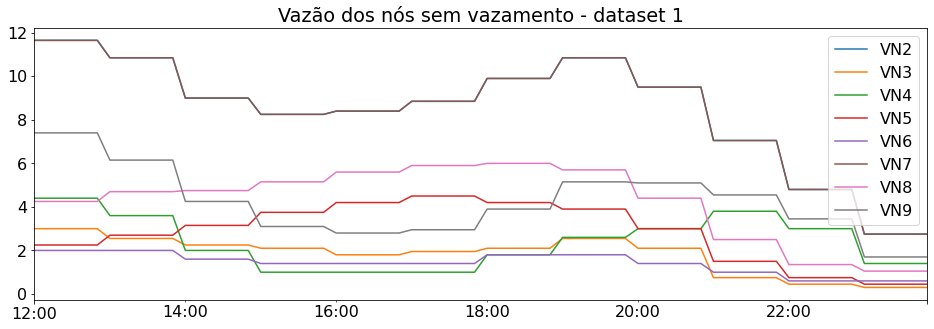

In [251]:
df1[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot(figsize=(16,5))
plt.title('Vazão dos nós sem vazamento - dataset 1');

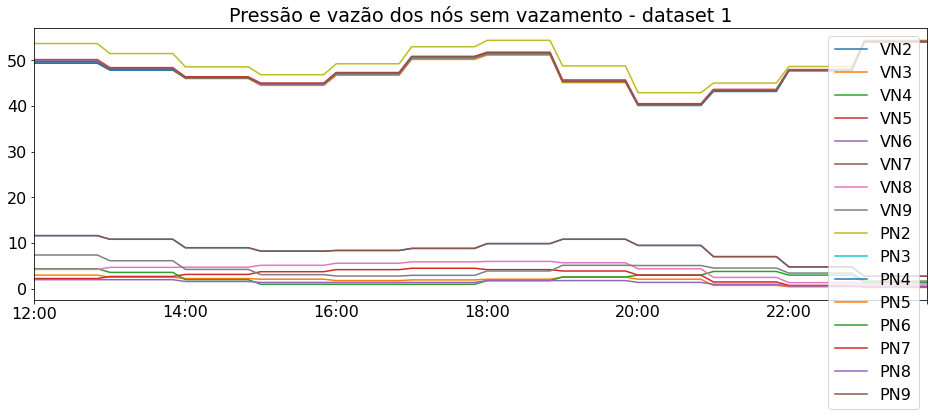

In [252]:
df1[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9', 
     'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão e vazão dos nós sem vazamento - dataset 1');

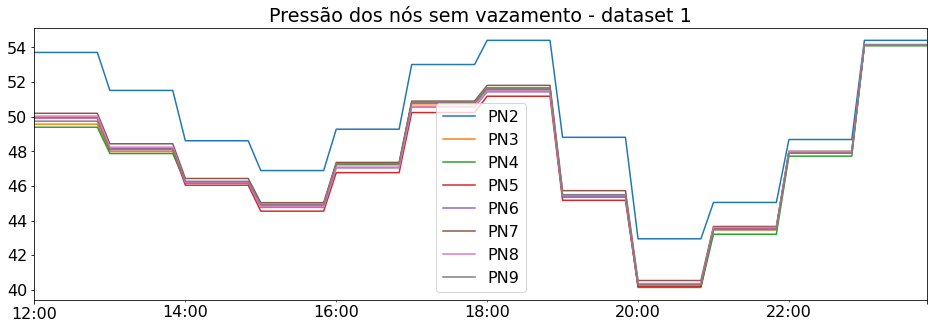

In [253]:
df1[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão dos nós sem vazamento - dataset 1');

## Dataset 2 - sem vazamento

In [254]:
df2 = pd.read_csv("data_2.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df2 = df2.loc[:, :64]

df2.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df2 = df2.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df2.index = period
df2.drop('T', inplace=True, axis=1)
df2 = df2['2021-01-01 12:00:00':]

display(df2.head())

,VN2,VN3,VN4,VN5,VN6,VN7,VN8,VN9,PN2,PN3,...,Y8,Y9,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9
2021-01-01 12:00:00,12.967,2.606,3.1552,2.8056,4.4,12.967,7.2056,5.7611,50.735,46.032,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:10:00,12.967,2.606,3.1552,2.8056,4.4,12.967,7.2056,5.7611,50.735,46.032,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:20:00,12.967,2.606,3.1552,2.8056,4.4,12.967,7.2056,5.7611,50.735,46.032,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:30:00,12.967,2.606,3.1552,2.8056,4.4,12.967,7.2056,5.7611,50.735,46.032,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:40:00,12.967,2.606,3.1552,2.8056,4.4,12.967,7.2056,5.7611,50.735,46.032,...,103,97,0,0,0,0,0,0,0,0


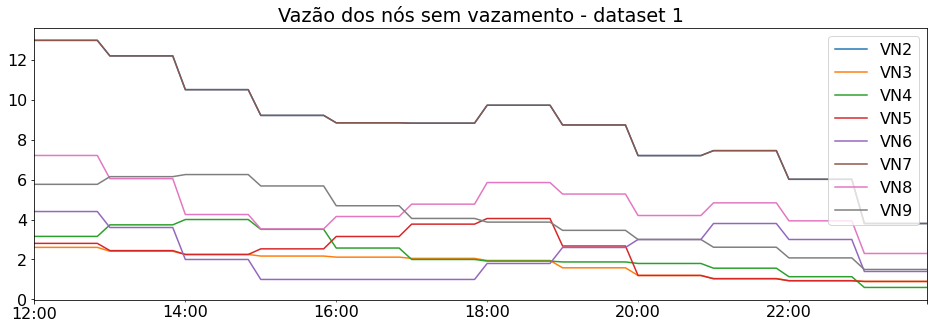

In [255]:
df2[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot(figsize=(16,5))
plt.title('Vazão dos nós sem vazamento - dataset 1');

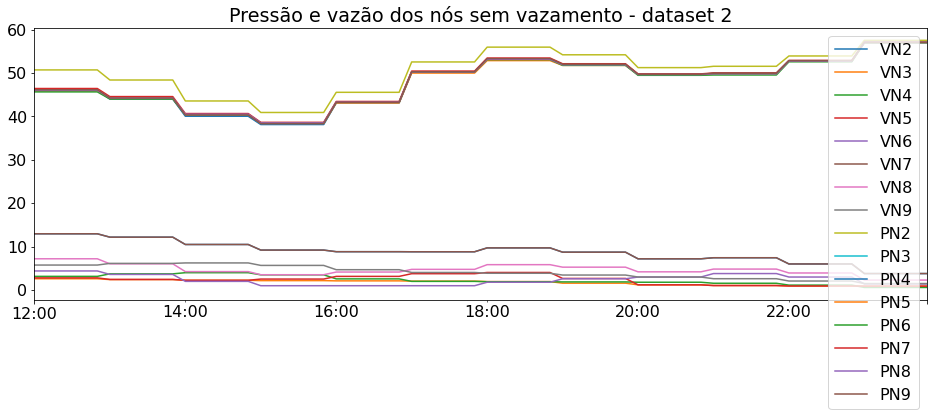

In [256]:
df2[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9', 
     'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão e vazão dos nós sem vazamento - dataset 2');

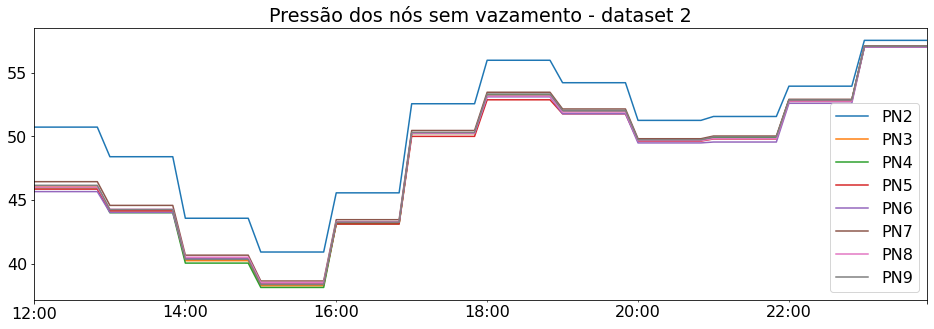

In [257]:
df2[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão dos nós sem vazamento - dataset 2');

## Dataset 3 - sem vazamento

In [258]:
df3 = pd.read_csv("data_3.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df3 = df3.loc[:, :64]

df3.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df3 = df3.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df3.index = period
df3.drop('T', inplace=True, axis=1)
df3 = df3['2021-01-01 12:00:00':]

display(df3.head())

,VN2,VN3,VN4,VN5,VN6,VN7,VN8,VN9,PN2,PN3,...,Y8,Y9,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9
2021-01-01 12:00:00,14.043,3.8878,3.7072,2.25,4.1978,14.043,6.4478,7.595,44.443,38.723,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:10:00,14.043,3.8878,3.7072,2.25,4.1978,14.043,6.4478,7.595,44.443,38.723,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:20:00,14.043,3.8878,3.7072,2.25,4.1978,14.043,6.4478,7.595,44.443,38.723,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:30:00,14.043,3.8878,3.7072,2.25,4.1978,14.043,6.4478,7.595,44.443,38.723,...,103,97,0,0,0,0,0,0,0,0
2021-01-01 12:40:00,14.043,3.8878,3.7072,2.25,4.1978,14.043,6.4478,7.595,44.443,38.723,...,103,97,0,0,0,0,0,0,0,0


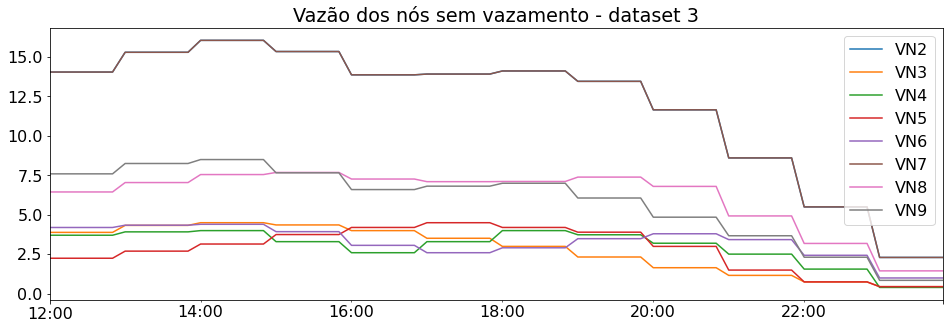

In [259]:
df3[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot(figsize=(16,5))
plt.title('Vazão dos nós sem vazamento - dataset 3');

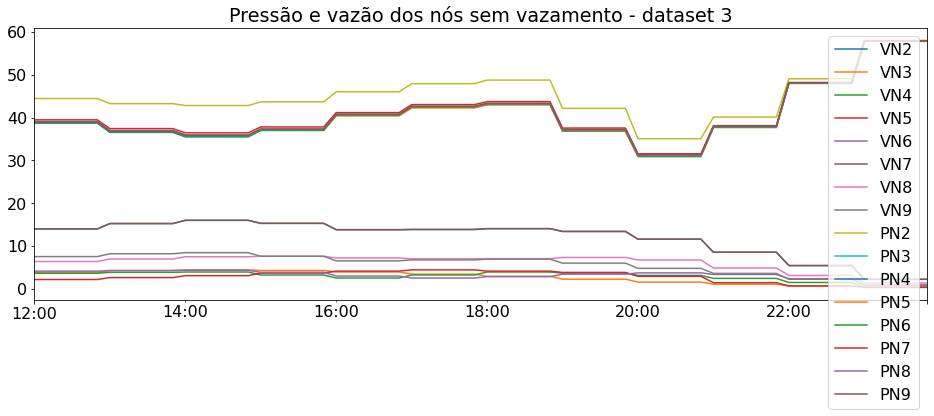

In [260]:
df3[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9', 
     'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão e vazão dos nós sem vazamento - dataset 3');

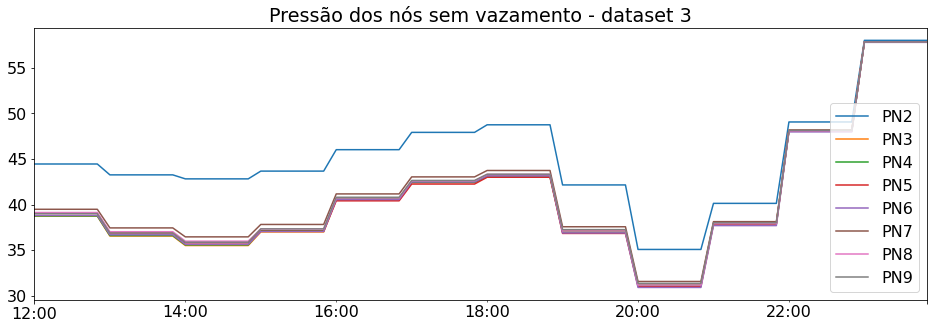

In [261]:
df3[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(figsize=(16,5))
plt.title('Pressão dos nós sem vazamento - dataset 3');

## Comparação dataset 1, dataset 2 e dataset 3 - Sem vazamentos

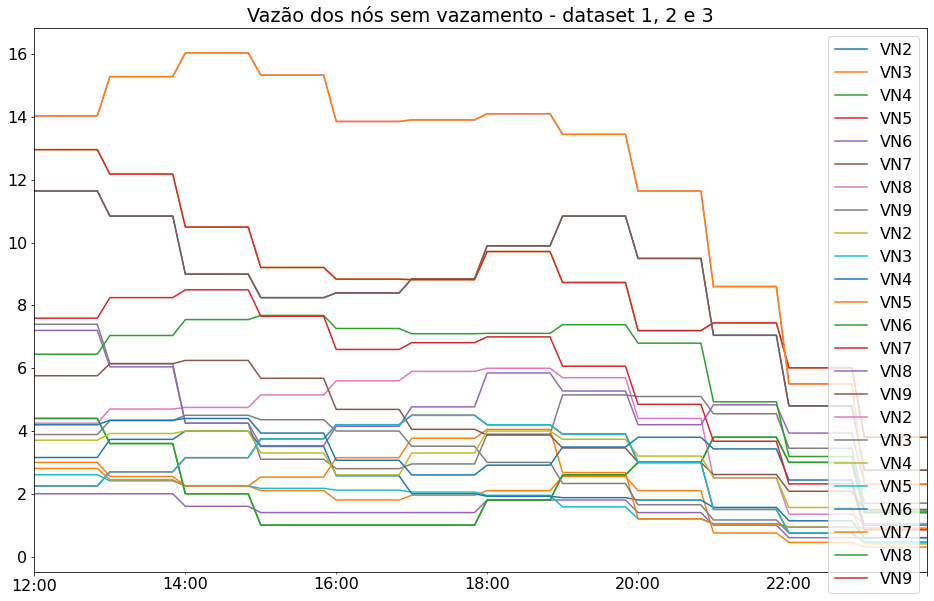

In [262]:
# Comparação de vazões/consumo
ax = df1[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot()
ax1 = df2[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot(ax = ax)
df3[['VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9']].plot(ax = ax1, figsize=(16,10))
plt.title('Vazão dos nós sem vazamento - dataset 1, 2 e 3');

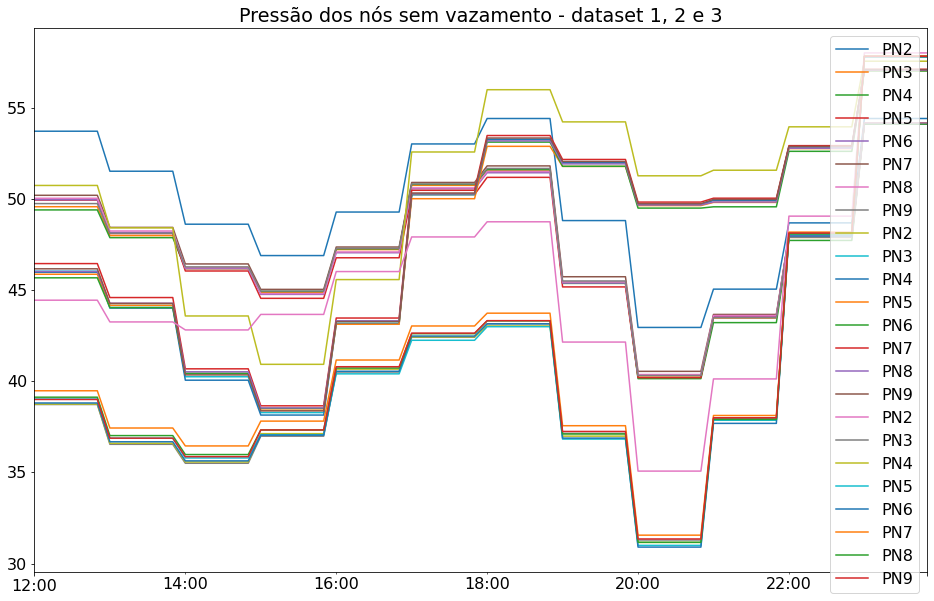

In [263]:
ax = df1[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot()
ax1 = df2[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax)
df3[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax1, figsize=(16,10))
plt.title('Pressão dos nós sem vazamento - dataset 1, 2 e 3');

# Análise dos vazamentos

## Dataset 4 - Análise de vazamento nó 12

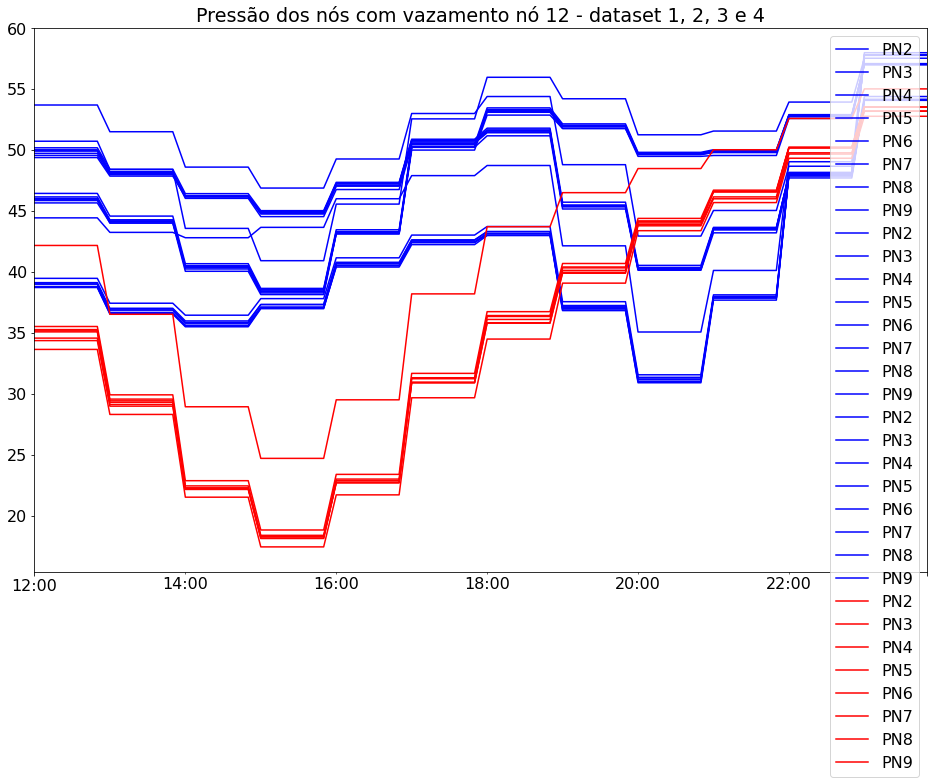

In [264]:
df4 = pd.read_csv("data_4.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df4 = df4.loc[:, :64]

df4.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df4 = df4.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df4.index = period
df4.drop('T', inplace=True, axis=1)

df4 = df4['2021-01-01 12:00:00':]

# Comparação de vazões/consumo
ax = df1[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(color = 'blue')
ax1 = df2[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax, color = 'blue')
ax2 = df3[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax1, color = 'blue')
df4[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax2, figsize=(16,10), color = 'red')
plt.title('Pressão dos nós com vazamento nó 12 - dataset 1, 2, 3 e 4');

## Dataset 5 - Análise de vazamento nó 12 (entre N3 e N4)

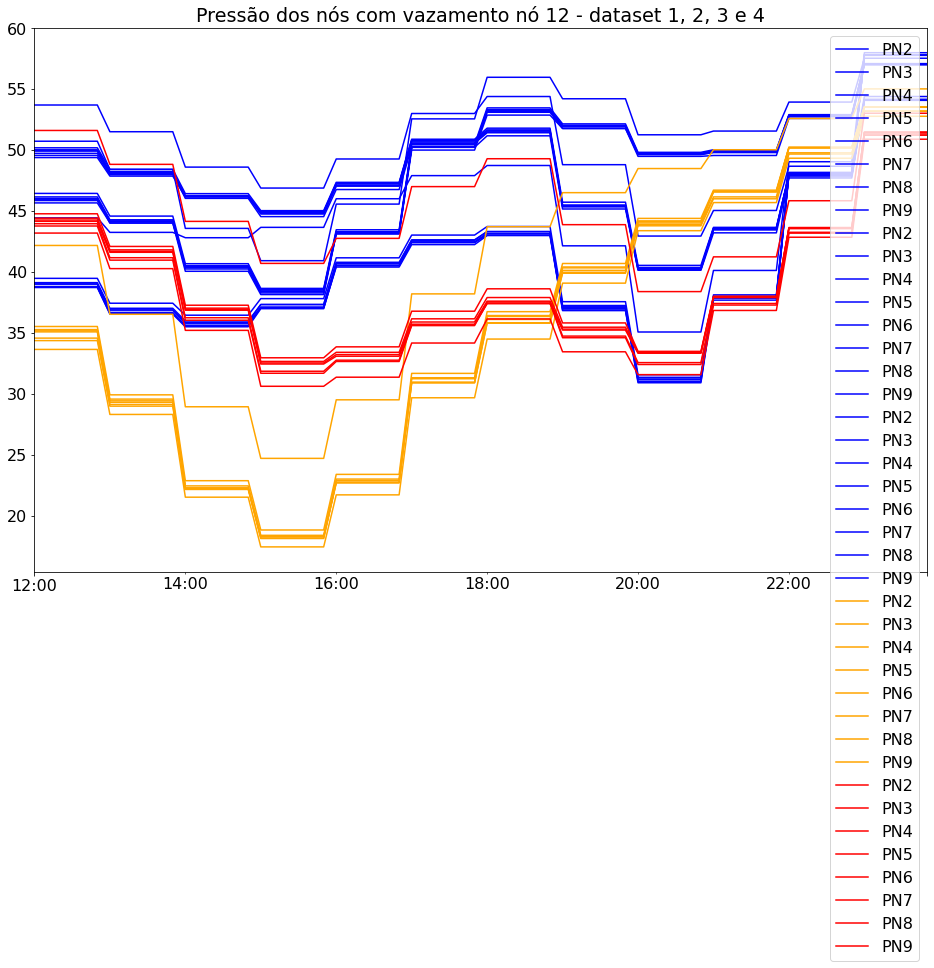

In [265]:
df5 = pd.read_csv("data_5.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df5 = df5.loc[:, :64]

df5.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df5 = df5.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df5.index = period
df5.drop('T', inplace=True, axis=1)

df5 = df5['2021-01-01 12:00:00':]

# Comparação de vazões/consumo
ax = df1[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(color = 'blue')
ax1 = df2[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax, color = 'blue')
ax2 = df3[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax1, color = 'blue')
ax3 = df4[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax2, color = 'orange')
df5[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax3, figsize=(16,10), color = 'red')
plt.title('Pressão dos nós com vazamento nó 12 - dataset 1, 2, 3 e 4');

<AxesSubplot:>

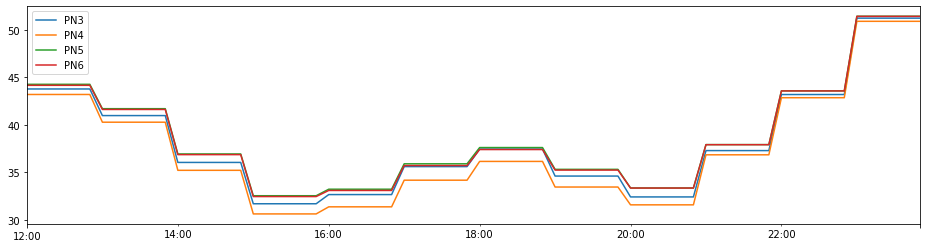

In [397]:
df5[['PN3', 'PN4', 'PN5', 'PN6']]['2021-01-01 11:00:00':].plot(figsize=(16,4))

## Dataset 6 - Análise de vazamento nó 12 (entre N3 e N4)

In [267]:
df6 = pd.read_csv("data_6.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df6 = df6.loc[:, :64]

df6.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df6 = df6.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df6.index = period
df6.drop('T', inplace=True, axis=1)

df6 = df6['2021-01-01 12:00:00':]

## Dataset 7 - Análise de vazamento nó 14 (entre N5 e N6)

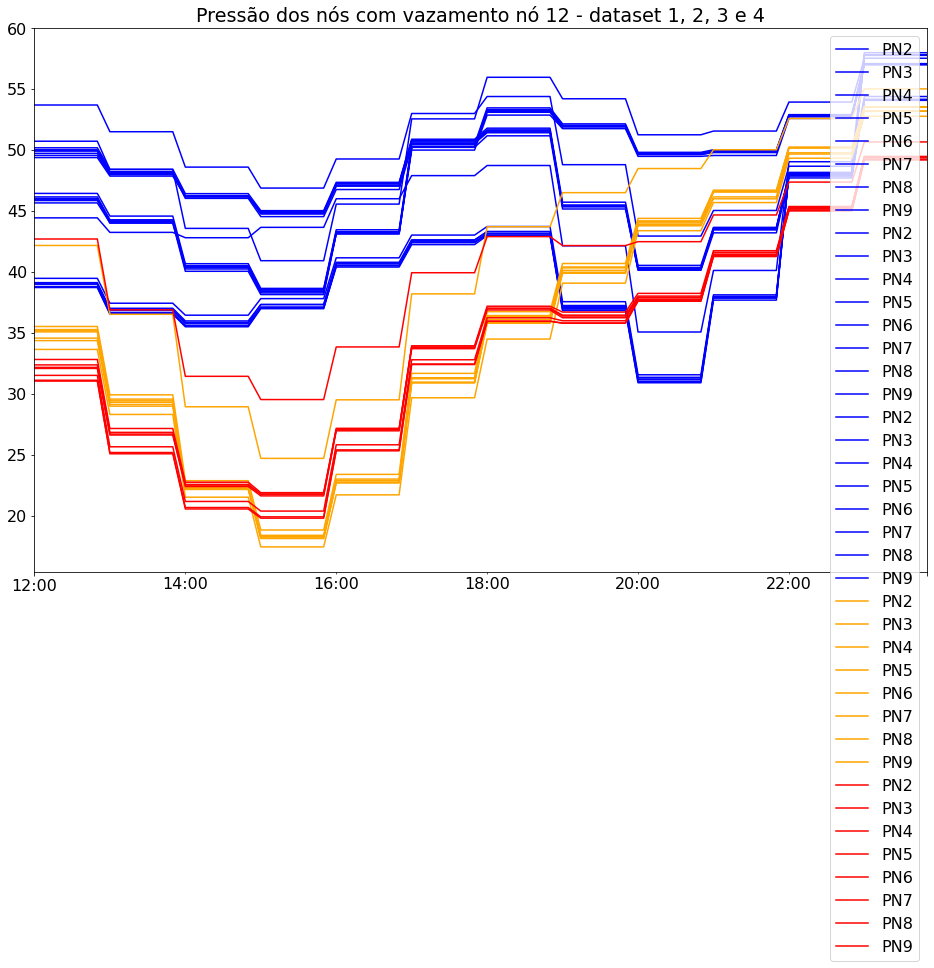

In [268]:
df7 = pd.read_csv("data_7.csv", header=None)

# EXCLUSÃO DOS NÓS DE VAZAMENTOS PARA ANÁLISE PRIMÁRIA
df7 = df7.loc[:, :64]

df7.columns = [
                'T',                                # TEMPO EM SEGUNDOS
                'VN2', 'VN3', 'VN4', 'VN5', 'VN6', 'VN7', 'VN8', 'VN9',  # VAZÃO NÓS
                'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9',  # PRESSÃO NÓS
                'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'VL7', 'VL8', 'VL9',   # VOLUME TOTAL NÓS
                'PVL2', 'PVL3', 'PVL4', 'PVL5', 'PVL6', 'PVL7', 'PVL8', 'PVL9', # PRESSÃO x VOLUME
                'PVN2', 'PVN3', 'PVN4', 'PVN5', 'PVN6', 'PVN7', 'PVN8', 'PVN9', # PRESSÃO x VAZÃO
                'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',       # COORD X NÓS
                'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',       # COORD Y NÓS
                'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'       # COORD Z NÓS
               ]

# AJUSTE PARA 144 INFO (144 X 10MIN = 1440 MIN = 24 HORAS)
df7 = df7.iloc[:-1, :]

# COLUNA (T) PARA COLUNA DE TIMESTAMP
period = pd.to_datetime(pd.date_range("2021/01/01, 00:00:00", "2021/01/01, 23:50:00", 
                      freq='10min').strftime("%Y/%m/%d, %H:%M:%S").tolist())
df7.index = period
df7.drop('T', inplace=True, axis=1)

df7 = df7['2021-01-01 12:00:00':]

# Comparação de vazões/consumo
ax = df1[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(color = 'blue')
ax1 = df2[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax, color = 'blue')
ax2 = df3[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax1, color = 'blue')
ax3 = df4[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax2, color = 'orange')
df7[['PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7', 'PN8', 'PN9']].plot(ax = ax3, figsize=(16,10), color = 'red')
plt.title('Pressão dos nós com vazamento nó 12 - dataset 1, 2, 3 e 4');

## Análise dados: Extração de features

In [302]:
# features datasets with no leaks
df1_ft_n2 = df1['PN2'].groupby(df1['PN2'].index.hour).describe().iloc[:, 1:]
df1_ft_n2['flag'] = np.zeros(len(df1_ft_n2))
df2_ft_n2 = df2['PN2'].groupby(df2['PN2'].index.hour).describe().iloc[:, 1:]
df2_ft_n2['flag'] = np.zeros(len(df2_ft_n2))
df3_ft_n2 = df3['PN2'].groupby(df3['PN2'].index.hour).describe().iloc[:, 1:]
df3_ft_n2['flag'] = np.zeros(len(df3_ft_n2))

df1_ft_n3 = df1['PN3'].groupby(df1['PN3'].index.hour).describe().iloc[:, 1:]
df1_ft_n3['flag'] = np.zeros(len(df1_ft_n3))
df2_ft_n3 = df2['PN3'].groupby(df2['PN3'].index.hour).describe().iloc[:, 1:]
df2_ft_n3['flag'] = np.zeros(len(df2_ft_n3))
df3_ft_n3 = df3['PN3'].groupby(df3['PN3'].index.hour).describe().iloc[:, 1:]
df3_ft_n3['flag'] = np.zeros(len(df3_ft_n3))

df1_ft_n4 = df1['PN4'].groupby(df1['PN4'].index.hour).describe().iloc[:, 1:]
df1_ft_n4['flag'] = np.zeros(len(df1_ft_n4))
df2_ft_n4 = df2['PN4'].groupby(df2['PN4'].index.hour).describe().iloc[:, 1:]
df2_ft_n4['flag'] = np.zeros(len(df2_ft_n4))
df3_ft_n4 = df3['PN4'].groupby(df3['PN4'].index.hour).describe().iloc[:, 1:]
df3_ft_n4['flag'] = np.zeros(len(df3_ft_n4))

df1_ft_n5 = df1['PN5'].groupby(df1['PN5'].index.hour).describe().iloc[:, 1:]
df1_ft_n5['flag'] = np.zeros(len(df1_ft_n5))
df2_ft_n5 = df2['PN5'].groupby(df2['PN5'].index.hour).describe().iloc[:, 1:]
df2_ft_n5['flag'] = np.zeros(len(df2_ft_n5))
df3_ft_n5 = df3['PN5'].groupby(df3['PN5'].index.hour).describe().iloc[:, 1:]
df3_ft_n5['flag'] = np.zeros(len(df3_ft_n5))

df1_ft_n6 = df1['PN6'].groupby(df1['PN6'].index.hour).describe().iloc[:, 1:]
df1_ft_n6['flag'] = np.zeros(len(df1_ft_n6))
df2_ft_n6 = df2['PN6'].groupby(df2['PN5'].index.hour).describe().iloc[:, 1:]
df2_ft_n6['flag'] = np.zeros(len(df2_ft_n6))
df3_ft_n6 = df3['PN6'].groupby(df3['PN6'].index.hour).describe().iloc[:, 1:]
df3_ft_n6['flag'] = np.zeros(len(df3_ft_n6))

df_concat_noleaks = pd.concat([df1_ft_n2, df2_ft_n2, df3_ft_n2,
                               df1_ft_n3, df2_ft_n3, df3_ft_n3, 
                               df1_ft_n4, df2_ft_n4, df3_ft_n4,
                               df1_ft_n5, df2_ft_n5, df3_ft_n5,
                               df1_ft_n6, df2_ft_n6, df3_ft_n6
                              ])

# features datasets with leaks
df4_ft_n2 = df4['PN2'].groupby(df4['PN2'].index.hour).describe().iloc[:, 1:]
df4_ft_n2['flag'] =  np.full((len(df4_ft_n2), 1), 1, dtype=int)
df5_ft_n2 = df5['PN2'].groupby(df5['PN2'].index.hour).describe().iloc[:, 1:]
df5_ft_n2['flag'] =  np.full((len(df5_ft_n2), 1), 1, dtype=int)
df6_ft_n2 = df6['PN2'].groupby(df6['PN2'].index.hour).describe().iloc[:, 1:]
df6_ft_n2['flag'] =  np.full((len(df6_ft_n2), 1), 1, dtype=int)

df4_ft_n3 = df4['PN3'].groupby(df4['PN3'].index.hour).describe().iloc[:, 1:]
df4_ft_n3['flag'] =  np.full((len(df4_ft_n3), 1), 1, dtype=int)
df5_ft_n3 = df5['PN3'].groupby(df5['PN3'].index.hour).describe().iloc[:, 1:]
df5_ft_n3['flag'] =  np.full((len(df5_ft_n3), 1), 1, dtype=int)
df6_ft_n3 = df6['PN3'].groupby(df6['PN3'].index.hour).describe().iloc[:, 1:]
df6_ft_n3['flag'] =  np.full((len(df6_ft_n3), 1), 1, dtype=int)

df4_ft_n4 = df4['PN4'].groupby(df4['PN4'].index.hour).describe().iloc[:, 1:]
df4_ft_n4['flag'] =  np.full((len(df4_ft_n4), 1), 1, dtype=int)
df5_ft_n4 = df5['PN4'].groupby(df5['PN4'].index.hour).describe().iloc[:, 1:]
df5_ft_n4['flag'] =  np.full((len(df5_ft_n4), 1), 1, dtype=int)
df6_ft_n4 = df6['PN4'].groupby(df6['PN4'].index.hour).describe().iloc[:, 1:]
df6_ft_n4['flag'] =  np.full((len(df6_ft_n4), 1), 1, dtype=int)

df4_ft_n5 = df4['PN5'].groupby(df4['PN5'].index.hour).describe().iloc[:, 1:]
df4_ft_n5['flag'] =  np.full((len(df4_ft_n5), 1), 1, dtype=int)
df5_ft_n5 = df5['PN5'].groupby(df5['PN5'].index.hour).describe().iloc[:, 1:]
df5_ft_n5['flag'] =  np.full((len(df5_ft_n5), 1), 1, dtype=int)
df6_ft_n5 = df6['PN5'].groupby(df6['PN5'].index.hour).describe().iloc[:, 1:]
df6_ft_n5['flag'] =  np.full((len(df6_ft_n5), 1), 1, dtype=int)

df4_ft_n6 = df4['PN6'].groupby(df4['PN6'].index.hour).describe().iloc[:, 1:]
df4_ft_n6['flag'] =  np.full((len(df4_ft_n6), 1), 1, dtype=int)
df5_ft_n6 = df5['PN6'].groupby(df5['PN6'].index.hour).describe().iloc[:, 1:]
df5_ft_n6['flag'] =  np.full((len(df5_ft_n6), 1), 1, dtype=int)
df6_ft_n6 = df6['PN6'].groupby(df6['PN6'].index.hour).describe().iloc[:, 1:]
df6_ft_n6['flag'] =  np.full((len(df6_ft_n6), 1), 1, dtype=int)

df_concat_leaks = pd.concat([df4_ft_n2, df5_ft_n2, df6_ft_n2,
                             df4_ft_n3, df5_ft_n3, df6_ft_n3, 
                             df4_ft_n4, df5_ft_n4, df6_ft_n4,
                             df4_ft_n5, df5_ft_n5, df6_ft_n5,
                             df4_ft_n6, df5_ft_n6, df6_ft_n6
                            ])

df_concat = pd.concat([df_concat_noleaks, df_concat_leaks])

display(df_concat['flag'].value_counts())

1.0    180
0.0    180
Name: flag, dtype: int64

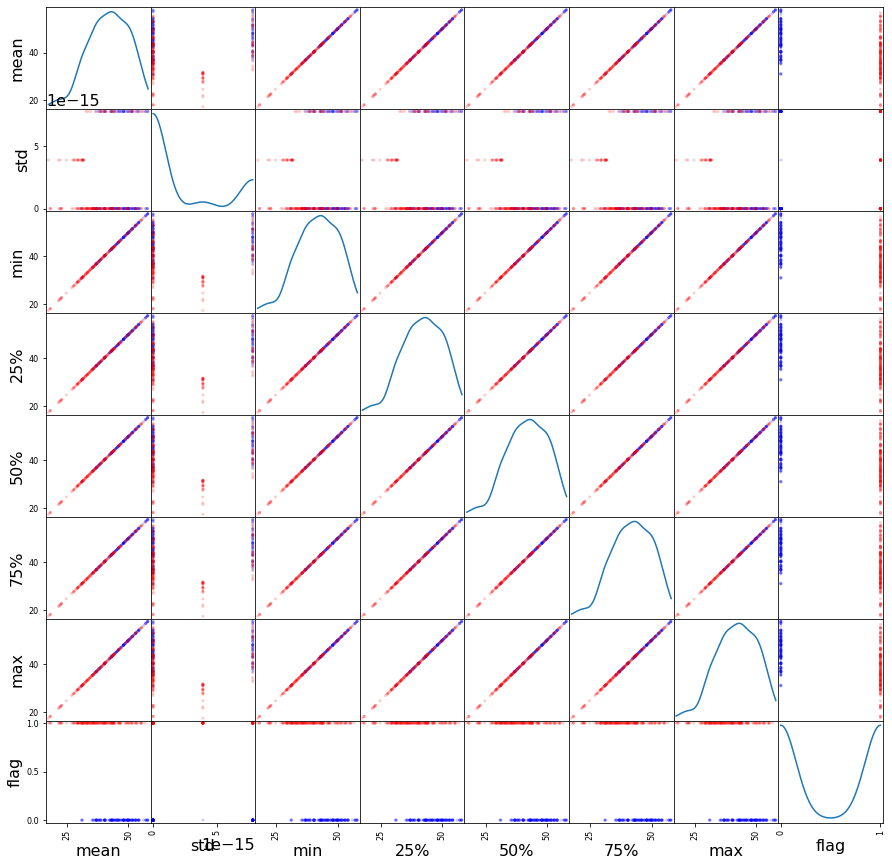

In [303]:
from pandas.plotting import scatter_matrix

color_wheel = {0: "blue", 1: "red"}
colors = df_concat['flag'].map(lambda x: color_wheel.get(x))
scatter_matrix(df_concat, c=colors, alpha = 0.2, figsize = (15, 15), diagonal = 'kde');

In [304]:
observables = df_concat.iloc[:, :-1]

X = observables
print(X.head())

y = df_concat['flag']
print(y.value_counts())

      mean           std     min     25%     50%     75%     max
12  53.709  0.000000e+00  53.709  53.709  53.709  53.709  53.709
13  51.515  7.783606e-15  51.515  51.515  51.515  51.515  51.515
14  48.610  7.783606e-15  48.610  48.610  48.610  48.610  48.610
15  46.890  7.783606e-15  46.890  46.890  46.890  46.890  46.890
16  49.277  7.783606e-15  49.277  49.277  49.277  49.277  49.277
1.0    180
0.0    180
Name: flag, dtype: int64


## Naive Bayes

In [305]:
# NAIVE BAYES
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print('Naive Bayes:', gnb_scores.mean())

Naive Bayes: 0.6888888888888889


## KNN

In [306]:
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

rand_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn.fit(X,y)

print('KNN:')
print(rand_knn.best_score_)
print(rand_knn.best_params_)
print(rand_knn.best_estimator_)

KNN:
0.7277777777777777
{'weights': 'uniform', 'n_neighbors': 7, 'leaf_size': 25, 'algorithm': 'kd_tree'}
KNeighborsClassifier(algorithm='kd_tree', leaf_size=25, n_neighbors=7)


## Árvore de decisão

In [307]:
# DECISION TREE
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 11), 
              'min_samples_leaf': sp_randint(1, 11)}

rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt.fit(X,y)
print('DECISION TREE:')
print(rand_dt.best_score_)
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

DECISION TREE:
0.7194444444444444
{'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 6}
DecisionTreeClassifier(max_features='log2', min_samples_leaf=8,
                       min_samples_split=6, random_state=42)


## Análise Alpha: Extração de features

In [287]:
# features datasets with no leaks
df1_ft_n3 = df1['PVL3'].groupby(df1['PVL3'].index.hour).describe().iloc[:, 1:]
df1_ft_n3['flag'] = np.zeros(len(df1_ft_n3))
df2_ft_n3 = df2['PVL3'].groupby(df2['PVL3'].index.hour).describe().iloc[:, 1:]
df2_ft_n3['flag'] = np.zeros(len(df2_ft_n3))

df1_ft_n4 = df1['PVL4'].groupby(df1['PVL4'].index.hour).describe().iloc[:, 1:]
df1_ft_n4['flag'] = np.zeros(len(df1_ft_n4))
df2_ft_n4 = df2['PVL4'].groupby(df2['PVL4'].index.hour).describe().iloc[:, 1:]
df2_ft_n4['flag'] = np.zeros(len(df2_ft_n4))

df1_ft_n5 = df1['PVL5'].groupby(df1['PVL5'].index.hour).describe().iloc[:, 1:]
df1_ft_n5['flag'] = np.zeros(len(df1_ft_n5))
df2_ft_n5 = df2['PVL5'].groupby(df2['PVL5'].index.hour).describe().iloc[:, 1:]
df2_ft_n5['flag'] = np.zeros(len(df2_ft_n5))

df1_ft_n6 = df1['PVL6'].groupby(df1['PVL6'].index.hour).describe().iloc[:, 1:]
df1_ft_n6['flag'] = np.zeros(len(df1_ft_n6))
df2_ft_n6 = df2['PVL6'].groupby(df2['PVL5'].index.hour).describe().iloc[:, 1:]
df2_ft_n6['flag'] = np.zeros(len(df2_ft_n6))

df_concat_noleaks_alpha = pd.concat([df1_ft_n3, df2_ft_n3, #df3_ft_n3, 
                                    df1_ft_n4, df2_ft_n4, #df3_ft_n4,
                                    df1_ft_n5, df2_ft_n5, #df3_ft_n5,
                                    df1_ft_n6, df2_ft_n6
                              ])

# features datasets with leaks
df4_ft_n3 = df4['PVL3'].groupby(df4['PVL3'].index.hour).describe().iloc[:, 1:]
df4_ft_n3['flag'] =  np.full((len(df4_ft_n3), 1), 1, dtype=int)
df5_ft_n3 = df5['PVL3'].groupby(df5['PVL3'].index.hour).describe().iloc[:, 1:]
df5_ft_n3['flag'] =  np.full((len(df5_ft_n3), 1), 1, dtype=int)

df4_ft_n4 = df4['PVL4'].groupby(df4['PVL4'].index.hour).describe().iloc[:, 1:]
df4_ft_n4['flag'] =  np.full((len(df4_ft_n4), 1), 1, dtype=int)
df5_ft_n4 = df5['PVL4'].groupby(df5['PVL4'].index.hour).describe().iloc[:, 1:]
df5_ft_n4['flag'] =  np.full((len(df5_ft_n4), 1), 1, dtype=int)

df4_ft_n5 = df4['PVL5'].groupby(df4['PVL5'].index.hour).describe().iloc[:, 1:]
df4_ft_n5['flag'] =  np.full((len(df4_ft_n5), 1), 1, dtype=int)
df5_ft_n5 = df5['PVL5'].groupby(df5['PVL5'].index.hour).describe().iloc[:, 1:]
df5_ft_n5['flag'] =  np.full((len(df5_ft_n5), 1), 1, dtype=int)

df4_ft_n6 = df4['PVL6'].groupby(df4['PVL6'].index.hour).describe().iloc[:, 1:]
df4_ft_n6['flag'] =  np.full((len(df4_ft_n6), 1), 1, dtype=int)
df5_ft_n6 = df5['PVL6'].groupby(df5['PVL6'].index.hour).describe().iloc[:, 1:]
df5_ft_n6['flag'] =  np.full((len(df5_ft_n6), 1), 1, dtype=int)

df_concat_leaks_alpha = pd.concat([df4_ft_n3, df5_ft_n3, 
                                  df4_ft_n4, df5_ft_n4,
                                  df4_ft_n6, df5_ft_n6,
                                  df4_ft_n6, df5_ft_n6])

df_concat_alpha = pd.concat([df_concat_noleaks_alpha, df_concat_leaks_alpha])

display(df_concat_alpha['flag'].value_counts())

1.0    96
0.0    96
Name: flag, dtype: int64

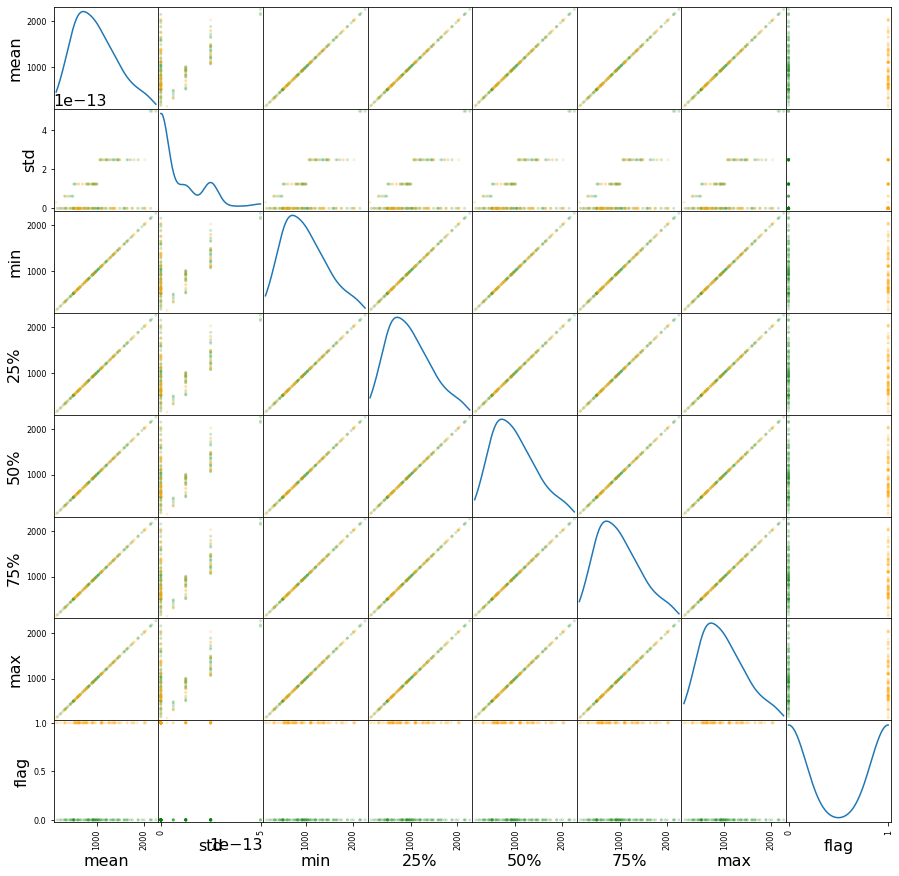

In [276]:
from pandas.plotting import scatter_matrix

color_wheel = {0: "green", 1: "orange"}
colors = df_concat_alpha['flag'].map(lambda x: color_wheel.get(x))
scatter_matrix(df_concat_alpha, c=colors, alpha = 0.2, figsize = (15, 15), diagonal = 'kde');

In [292]:
observables = df_concat_alpha.iloc[:, :-1]

X = observables
print(X.head())

y = df_concat_alpha['flag']
print(y.value_counts())

       mean           std      min      25%      50%      75%      max
12  1487.10  2.490754e-13  1487.10  1487.10  1487.10  1487.10  1487.10
13  1223.60  2.490754e-13  1223.60  1223.60  1223.60  1223.60  1223.60
14  1038.80  0.000000e+00  1038.80  1038.80  1038.80  1038.80  1038.80
15   941.99  1.245377e-13   941.99   941.99   941.99   941.99   941.99
16   849.92  0.000000e+00   849.92   849.92   849.92   849.92   849.92
1.0    96
0.0    96
Name: flag, dtype: int64


### Naive Bayes

In [293]:
# NAIVE BAYES
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print('Naive Bayes:', gnb_scores.mean())

Naive Bayes: 0.42210526315789476


### KNN

In [294]:
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

rand_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn.fit(X,y)

print('KNN:')
print(rand_knn.best_score_)
print(rand_knn.best_params_)
print(rand_knn.best_estimator_)

KNN:
0.6576315789473685
{'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 22, 'algorithm': 'auto'}
KNeighborsClassifier(leaf_size=22, n_neighbors=3, weights='distance')


### Árvore de decisão

In [295]:
# DECISION TREE
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 11), 
              'min_samples_leaf': sp_randint(1, 11)}

rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt.fit(X,y)
print('DECISION TREE:')
print(rand_dt.best_score_)
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

DECISION TREE:
0.6528947368421052
{'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
DecisionTreeClassifier(max_features='log2', min_samples_split=3,
                       random_state=42)


In [297]:
df_concat.to_csv('dataset_km.csv')

# Inferência da localização do vazamento

In [377]:
df1[['X3', 'Y3']].iloc[0], df1[['X4', 'Y4']].iloc[0], df1[['X5', 'Y5']].iloc[0], df1[['X6', 'Y6']].iloc[0]

(X3    126
 Y3     95
 Name: 2021-01-01 12:00:00, dtype: int64,
 X4    134
 Y4     95
 Name: 2021-01-01 12:00:00, dtype: int64,
 X5    126
 Y5    105
 Name: 2021-01-01 12:00:00, dtype: int64,
 X6    134
 Y6    105
 Name: 2021-01-01 12:00:00, dtype: int64)

In [389]:
# features datasets with no leaks
df1_ft_n3 = df1['PN3'].groupby(df1['PN3'].index.hour).describe().iloc[:, 1:]
df1_ft_n3['X'] = np.resize(df1['X3'][0], len(df1_ft_n3))
df1_ft_n3['Y'] = np.resize(df1['Y3'][0], len(df1_ft_n3))
df1_ft_n3['Z'] = np.resize(df1['Z3'][0], len(df1_ft_n3))
df1_ft_n3['flag'] = np.zeros(len(df1_ft_n3))
df2_ft_n3 = df2['PN3'].groupby(df2['PN3'].index.hour).describe().iloc[:, 1:]
df2_ft_n3['X'] = np.resize(df2['X3'][0], len(df2_ft_n3))
df2_ft_n3['Y'] = np.resize(df2['Y3'][0], len(df2_ft_n3))
df2_ft_n3['Z'] = np.resize(df2['Z3'][0], len(df2_ft_n3))
df2_ft_n3['flag'] = np.zeros(len(df2_ft_n3))
df3_ft_n3 = df3['PN3'].groupby(df3['PN3'].index.hour).describe().iloc[:, 1:]
df3_ft_n3['X'] = np.resize(df3['X3'][0], len(df3_ft_n3))
df3_ft_n3['Y'] = np.resize(df3['Y3'][0], len(df3_ft_n3))
df3_ft_n3['Z'] = np.resize(df3['Z3'][0], len(df3_ft_n3))
df3_ft_n3['flag'] = np.zeros(len(df3_ft_n3))

df1_ft_n4 = df1['PN4'].groupby(df1['PN4'].index.hour).describe().iloc[:, 1:]
df1_ft_n4['X'] = np.resize(df1['X4'][0], len(df1_ft_n4))
df1_ft_n4['Y'] = np.resize(df1['Y4'][0], len(df1_ft_n4))
df1_ft_n4['Z'] = np.resize(df1['Z4'][0], len(df1_ft_n4))
df1_ft_n4['flag'] = np.zeros(len(df1_ft_n4))
df2_ft_n4 = df2['PN4'].groupby(df2['PN4'].index.hour).describe().iloc[:, 1:]
df2_ft_n4['X'] = np.resize(df2['X4'][0], len(df2_ft_n4))
df2_ft_n4['Y'] = np.resize(df2['Y4'][0], len(df2_ft_n4))
df2_ft_n4['Z'] = np.resize(df2['Z4'][0], len(df2_ft_n4))
df2_ft_n4['flag'] = np.zeros(len(df2_ft_n4))
df3_ft_n4 = df3['PN4'].groupby(df3['PN4'].index.hour).describe().iloc[:, 1:]
df3_ft_n4['X'] = np.resize(df3['X4'][0], len(df3_ft_n4))
df3_ft_n4['Y'] = np.resize(df3['Y4'][0], len(df3_ft_n4))
df3_ft_n4['Z'] = np.resize(df3['Z4'][0], len(df3_ft_n4))
df3_ft_n4['flag'] = np.zeros(len(df3_ft_n4))

df1_ft_n5 = df1['PN5'].groupby(df1['PN5'].index.hour).describe().iloc[:, 1:]
df1_ft_n5['X'] = np.resize(df1['X5'][0], len(df1_ft_n5))
df1_ft_n5['Y'] = np.resize(df1['Y5'][0], len(df1_ft_n5))
df1_ft_n5['Z'] = np.resize(df1['Z5'][0], len(df1_ft_n5))
df1_ft_n5['flag'] = np.zeros(len(df1_ft_n5))
df2_ft_n5 = df2['PN5'].groupby(df2['PN5'].index.hour).describe().iloc[:, 1:]
df2_ft_n5['X'] = np.resize(df2['X5'][0], len(df2_ft_n5))
df2_ft_n5['Y'] = np.resize(df2['Y5'][0], len(df2_ft_n5))
df2_ft_n5['Z'] = np.resize(df2['Z5'][0], len(df2_ft_n5))
df2_ft_n5['flag'] = np.zeros(len(df2_ft_n5))
df3_ft_n5 = df3['PN5'].groupby(df3['PN5'].index.hour).describe().iloc[:, 1:]
df3_ft_n5['X'] = np.resize(df3['X5'][0], len(df3_ft_n5))
df3_ft_n5['Y'] = np.resize(df3['Y5'][0], len(df3_ft_n5))
df3_ft_n5['Z'] = np.resize(df3['Z5'][0], len(df3_ft_n5))
df3_ft_n5['flag'] = np.zeros(len(df3_ft_n5))

df1_ft_n6 = df1['PN6'].groupby(df1['PN6'].index.hour).describe().iloc[:, 1:]
df1_ft_n6['X'] = np.resize(df1['X6'][0], len(df1_ft_n6))
df1_ft_n6['Y'] = np.resize(df1['Y6'][0], len(df1_ft_n6))
df1_ft_n6['Z'] = np.resize(df1['Z6'][0], len(df1_ft_n6))
df1_ft_n6['flag'] = np.zeros(len(df1_ft_n6))
df2_ft_n6 = df2['PN6'].groupby(df2['PN6'].index.hour).describe().iloc[:, 1:]
df2_ft_n6['X'] = np.resize(df2['X6'][0], len(df2_ft_n6))
df2_ft_n6['Y'] = np.resize(df2['Y6'][0], len(df2_ft_n6))
df2_ft_n6['Z'] = np.resize(df2['Z6'][0], len(df2_ft_n6))
df2_ft_n6['flag'] = np.zeros(len(df2_ft_n6))
df3_ft_n6 = df3['PN6'].groupby(df3['PN6'].index.hour).describe().iloc[:, 1:]
df3_ft_n6['X'] = np.resize(df3['X6'][0], len(df3_ft_n6))
df3_ft_n6['Y'] = np.resize(df3['Y6'][0], len(df3_ft_n6))
df3_ft_n6['Z'] = np.resize(df3['Z6'][0], len(df3_ft_n6))
df3_ft_n6['flag'] = np.zeros(len(df3_ft_n6))

df_concat_noleaks = pd.concat([df1_ft_n3, df2_ft_n3, df3_ft_n3, 
                               df1_ft_n4, df2_ft_n4, df3_ft_n4,
                               df1_ft_n5, df2_ft_n5, df3_ft_n5,
                               df1_ft_n6, df2_ft_n6, df3_ft_n6
                              ])

In [390]:
# features datasets with leaks
df4_ft_n3 = df4['PN3'].groupby(df4['PN3'].index.hour).describe().iloc[:, 1:]
df4_ft_n3['X'] = np.resize(df4['X3'][0], len(df4_ft_n3))
df4_ft_n3['Y'] = np.resize(df4['Y3'][0], len(df4_ft_n3))
df4_ft_n3['Z'] = np.resize(df4['Z3'][0], len(df4_ft_n3))
df4_ft_n3['flag'] =  np.full((len(df4_ft_n3), 1), 1, dtype=int)
df5_ft_n3 = df5['PN3'].groupby(df5['PN3'].index.hour).describe().iloc[:, 1:]
df5_ft_n3['X'] = np.resize(df5['X3'][0], len(df5_ft_n3))
df5_ft_n3['Y'] = np.resize(df5['Y3'][0], len(df5_ft_n3))
df5_ft_n3['Z'] = np.resize(df5['Z3'][0], len(df5_ft_n3))
df5_ft_n3['flag'] =  np.full((len(df5_ft_n3), 1), 1, dtype=int)
df6_ft_n3 = df6['PN3'].groupby(df6['PN3'].index.hour).describe().iloc[:, 1:]
df6_ft_n3['X'] = np.resize(df6['X3'][0], len(df6_ft_n3))
df6_ft_n3['Y'] = np.resize(df6['Y3'][0], len(df6_ft_n3))
df6_ft_n3['Z'] = np.resize(df6['Z3'][0], len(df6_ft_n3))
df6_ft_n3['flag'] =  np.full((len(df6_ft_n3), 1), 1, dtype=int)

df4_ft_n4 = df4['PN4'].groupby(df4['PN4'].index.hour).describe().iloc[:, 1:]
df4_ft_n4['X'] = np.resize(df4['X4'][0], len(df4_ft_n4))
df4_ft_n4['Y'] = np.resize(df4['Y4'][0], len(df4_ft_n4))
df4_ft_n4['Z'] = np.resize(df4['Z4'][0], len(df4_ft_n4))
df4_ft_n4['flag'] =  np.full((len(df4_ft_n4), 1), 1, dtype=int)
df5_ft_n4 = df5['PN4'].groupby(df5['PN4'].index.hour).describe().iloc[:, 1:]
df5_ft_n4['X'] = np.resize(df5['X4'][0], len(df5_ft_n4))
df5_ft_n4['Y'] = np.resize(df5['Y4'][0], len(df5_ft_n4))
df5_ft_n4['Z'] = np.resize(df5['Z4'][0], len(df5_ft_n4))
df5_ft_n4['flag'] =  np.full((len(df5_ft_n4), 1), 1, dtype=int)
df6_ft_n4 = df6['PN4'].groupby(df6['PN4'].index.hour).describe().iloc[:, 1:]
df6_ft_n4['X'] = np.resize(df6['X4'][0], len(df6_ft_n4))
df6_ft_n4['Y'] = np.resize(df6['Y4'][0], len(df6_ft_n4))
df6_ft_n4['Z'] = np.resize(df6['Z4'][0], len(df6_ft_n4))
df6_ft_n4['flag'] =  np.full((len(df6_ft_n4), 1), 1, dtype=int)

df4_ft_n5 = df4['PN5'].groupby(df4['PN5'].index.hour).describe().iloc[:, 1:]
df4_ft_n5['X'] = np.resize(df4['X5'][0], len(df4_ft_n5))
df4_ft_n5['Y'] = np.resize(df4['Y5'][0], len(df4_ft_n5))
df4_ft_n5['Z'] = np.resize(df4['Z5'][0], len(df4_ft_n5))
df4_ft_n5['flag'] =  np.full((len(df4_ft_n5), 1), 1, dtype=int)
df5_ft_n5 = df5['PN5'].groupby(df5['PN5'].index.hour).describe().iloc[:, 1:]
df5_ft_n5['X'] = np.resize(df5['X5'][0], len(df5_ft_n5))
df5_ft_n5['Y'] = np.resize(df5['Y5'][0], len(df5_ft_n5))
df5_ft_n5['Z'] = np.resize(df5['Z5'][0], len(df5_ft_n5))
df5_ft_n5['flag'] =  np.full((len(df5_ft_n5), 1), 1, dtype=int)
df6_ft_n5 = df6['PN5'].groupby(df6['PN5'].index.hour).describe().iloc[:, 1:]
df6_ft_n5['X'] = np.resize(df6['X5'][0], len(df6_ft_n5))
df6_ft_n5['Y'] = np.resize(df6['Y5'][0], len(df6_ft_n5))
df6_ft_n5['Z'] = np.resize(df6['Z5'][0], len(df6_ft_n5))
df6_ft_n5['flag'] =  np.full((len(df6_ft_n5), 1), 1, dtype=int)

df4_ft_n6 = df4['PN6'].groupby(df4['PN6'].index.hour).describe().iloc[:, 1:]
df4_ft_n6['X'] = np.resize(df4['X6'][0], len(df4_ft_n6))
df4_ft_n6['Y'] = np.resize(df4['Y6'][0], len(df4_ft_n6))
df4_ft_n6['Z'] = np.resize(df4['Z6'][0], len(df4_ft_n6))
df4_ft_n6['flag'] =  np.full((len(df4_ft_n6), 1), 1, dtype=int)
df5_ft_n6 = df5['PN6'].groupby(df5['PN6'].index.hour).describe().iloc[:, 1:]
df5_ft_n6['X'] = np.resize(df5['X6'][0], len(df5_ft_n6))
df5_ft_n6['Y'] = np.resize(df5['Y6'][0], len(df5_ft_n6))
df5_ft_n6['Z'] = np.resize(df5['Z6'][0], len(df5_ft_n6))
df5_ft_n6['flag'] =  np.full((len(df5_ft_n6), 1), 1, dtype=int)
df6_ft_n6 = df6['PN6'].groupby(df6['PN6'].index.hour).describe().iloc[:, 1:]
df6_ft_n6['X'] = np.resize(df6['X6'][0], len(df6_ft_n6))
df6_ft_n6['Y'] = np.resize(df6['Y6'][0], len(df6_ft_n6))
df6_ft_n6['Z'] = np.resize(df6['Z6'][0], len(df6_ft_n6))
df6_ft_n6['flag'] =  np.full((len(df6_ft_n6), 1), 1, dtype=int)

df_concat_leaks = pd.concat([df4_ft_n3, df5_ft_n3, df6_ft_n3, 
                             df4_ft_n4, df5_ft_n4, df6_ft_n4,
                             df4_ft_n5, df5_ft_n5, df6_ft_n5,
                             df4_ft_n6, df5_ft_n6, df6_ft_n6
                            ])

df_concat = pd.concat([df_concat_noleaks, df_concat_leaks])

display(df_concat['flag'].value_counts())

1.0    144
0.0    144
Name: flag, dtype: int64

In [391]:
display(df_concat.head())

,mean,std,min,25%,50%,75%,max,X,Y,Z,flag
12,49.569,0.000000e+00,49.569,49.569,49.569,49.569,49.569,126,95,0,0.0
13,47.985,7.783606e-15,47.985,47.985,47.985,47.985,47.985,126,95,0,0.0
14,46.168,0.000000e+00,46.168,46.168,46.168,46.168,46.168,126,95,0,0.0
15,44.857,0.000000e+00,44.857,44.857,44.857,44.857,44.857,126,95,0,0.0
16,47.218,7.783606e-15,47.218,47.218,47.218,47.218,47.218,126,95,0,0.0


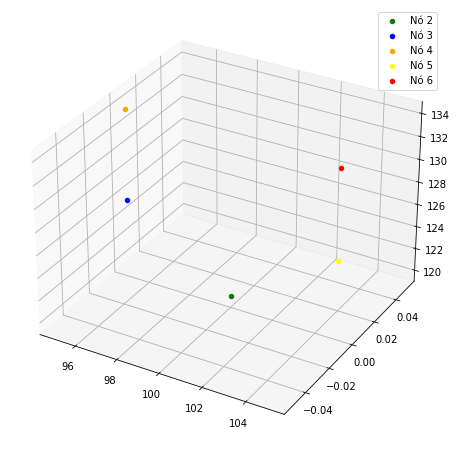

In [394]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = df1[['X2', 'Y2', 'Z2']].iloc[0][0]
xdata = df1[['X2', 'Y2', 'Z2']].iloc[0][1]
ydata = df1[['X2', 'Y2', 'Z2']].iloc[0][2]
ax.scatter3D(xdata, ydata, zdata, c='green', label='Nó 2')

zdata = df1[['X3', 'Y3', 'Z3']].iloc[0][0]
xdata = df1[['X3', 'Y3', 'Z3']].iloc[0][1]
ydata = df1[['X3', 'Y3', 'Z3']].iloc[0][2]
ax.scatter3D(xdata, ydata, zdata, c='blue', label='Nó 3')

zdata = df1[['X4', 'Y4', 'Z4']].iloc[0][0]
xdata = df1[['X4', 'Y4', 'Z4']].iloc[0][1]
ydata = df1[['X4', 'Y4', 'Z4']].iloc[0][2]
ax.scatter3D(xdata, ydata, zdata, c='orange', label='Nó 4')

zdata = df1[['X5', 'Y5', 'Z5']].iloc[0][0]
xdata = df1[['X5', 'Y5', 'Z5']].iloc[0][1]
ydata = df1[['X5', 'Y5', 'Z5']].iloc[0][2]
ax.scatter3D(xdata, ydata, zdata, c='yellow', label='Nó 5')

zdata = df1[['X6', 'Y6', 'Z6']].iloc[0][0]
xdata = df1[['X6', 'Y6', 'Z6']].iloc[0][1]
ydata = df1[['X6', 'Y6', 'Z6']].iloc[0][2]
ax.scatter3D(xdata, ydata, zdata, c='red', label='Nó 6')

plt.legend()
plt.show()

In [396]:
df_concat.to_csv('dataset_km_coord.csv', index=False)